In [1]:
# Import all the required libraries
import re
import pandas as pd
import numpy as np
import os
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import string
!pip install emoji
import emoji
pd.set_option('display.max_rows',500)
import warnings
warnings.filterwarnings("ignore")
#import stopwords and text processing libraries
from collections import Counter
import string
import unicodedata
import nltk
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

In [2]:
#import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Basic EDA on cnbc_headlines dataset
Read csv file of cnbc headlines using pandas


In [3]:
df_cnbc = pd.read_csv('cnbc_headlines.csv')
df_cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


Check the shape of cnbc headline dataset

In [4]:
df_cnbc.shape


(3080, 3)

Check all the columns in the cnbc headline dataset


In [5]:
df_cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

Check which columns are having categorical, numerical or boolean values


In [6]:
df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


Check for missing values in all the columnns of cnbc headline dataset


In [7]:
df_cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

Observation:
There is 280 missing values in headlines, description and time


Drop nan values in cnbc headline dataset


In [8]:
df_cnbc.dropna(inplace = True)

Drop the duplicate rows in the dataset keep the first one


In [9]:
df_cnbc.drop_duplicates(keep = 'first', inplace=True)

Check the shape of cnbc headline dataset


In [10]:
df_cnbc.shape

(2800, 3)

Reset index


In [11]:
df_cnbc.reset_index(drop = True, inplace = True)

# Basic EDA on Gaurdian headlines dataset
Read csv file of gaurdian headlines using pandas

In [12]:
df_guardian = pd.read_csv('guardian_headlines.csv')
df_guardian.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


Check the shape of gaurdian headline dataset


In [13]:
df_guardian.shape

(17800, 2)

Check columns of gaurdian headline


In [14]:
df_guardian.columns

Index(['Time', 'Headlines'], dtype='object')

Check which columns are having categorical, numerical or boolean values


In [15]:
df_guardian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.3+ KB


Check null values in gaurdian headlines dataset


In [16]:
df_guardian.isnull().sum()

Time         0
Headlines    0
dtype: int64

Drop duplicate rows in headlines and keep the first one


In [17]:
df_guardian.drop_duplicates(keep = 'first', inplace = True)

Reset index


In [18]:
df_guardian.reset_index(drop = True, inplace = True)

# Basic EDA on reuters headlines
Read csv file of reuters headlines using using pandas

In [19]:
df_reuters = pd.read_csv('reuters_headlines.csv')
df_reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


Check the shape of reuters headlines dataset


In [20]:
df_reuters.shape

(32770, 3)

Check the columns of reuters headline dataset


In [21]:
df_reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

Check which columns are having categorical, numerical or boolean values


In [22]:
df_reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


Check for missing values in all the columnns of reuters headlines dataset


In [23]:
df_reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

Drop the duplicate rows in reuters headlines dataset and keep the first one


In [24]:
df_reuters.drop_duplicates(keep ='first', inplace = True)

In [25]:
df_reuters.reset_index(drop = True, inplace = True)

# SENTIMENT ANAYSIS
Create a function for preprocessing


In [26]:
def preprocess(x):
    #convert all to lowercase
    x = x.lower()
    #remove puntuations
    remove_punct = str.maketrans('', '', string.punctuation)
    x = x.translate(remove_punct)
    #remove stopword
    stopwordslist = stopwords.words('english')
    tokens = word_tokenize(x)
    result = [w for w in tokens if not w in stopwordslist]
    #stemming
    ps = PorterStemmer()
    stemwords = [ps.stem(w) for w in result]
    #lemmitizing
    lemmatizer = WordNetLemmatizer()
    lemmawords = [lemmatizer.lemmatize(w) for w in stemwords]
    return ( " ".join(lemmawords))

Import sentiment intensity analyzer


In [27]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# create sentiment intensity analyzer object
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Create fuction to decide sentiment as positive, negative and neutral


In [28]:
def polarity(a):
    return sid.polarity_scores(a)['compound']

Concatenate cnbc headlines dataset and reuters headline dataset


In [29]:
df_concatened_d = pd.concat([df_cnbc, df_reuters], axis = 0)

Check the shape of this new dataset


In [30]:
df_concatened_d.shape

(35515, 3)

Make a copy of new dataset


In [31]:
df_concatened_d_copy = df_concatened_d.copy()

Apply preprocessing to the description of new dataset


In [32]:
df_concatened_d['Description'] = df_concatened_d['Description'].apply(lambda x : preprocess(x))

Analyze polarity score of values in description and add new column of it in dataset


In [33]:
df_concatened_d['ds_score'] = df_concatened_d['Description'].apply(lambda x: polarity(x))

Create a function which will assign sentiment based on polarity score


In [34]:
def assign_sentiment(x):
    if x > 0:
        return 'Positive'
    if x < 0:
        return 'Negative'
    if x == 0:
        return 'Neutral'

Apply the function which decides sentiment to polarity score column


In [35]:
df_concatened_d['ds_score'] = df_concatened_d['ds_score'].apply(lambda x : assign_sentiment(x))

In [36]:
df_concatened_d.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative


Plot a count plot on description score column


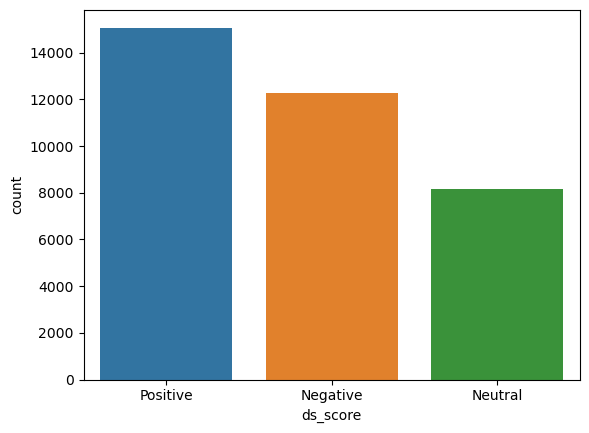

In [43]:
sns.countplot(x='ds_score', data=df_concatened_d)
plt.show()

Observation:

Descriptions contains approximately:

14000 positive statment

12000 negative statment

8000 neutral statment



# Plot a pie plot on description score column

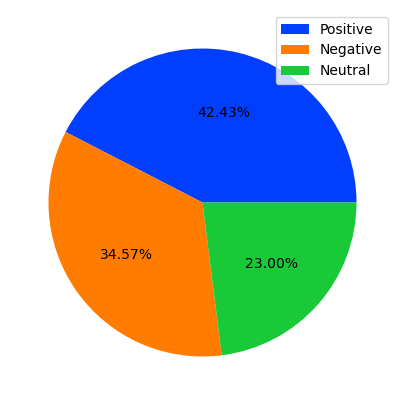

In [44]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_d['ds_score'].value_counts(normalize = True), autopct='%.2f%%', colors=palette_color)
plt.legend(['Positive', 'Negative', 'Neutral'])
# displaying

Observation:
    
Descriptions contains:
    
42.43 % positive statments

34.57 % negtive statements

23.00 % neutral statments

# Spliting in Independent and Dependent Features


In [46]:
X = df_concatened_d['Description']
y = df_concatened_d['ds_score']

# Train test split

Split the dataset into test and train
90% train , 10% test and random state 212


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

# Modelling on description of cnbc headlines dataset and reuters headline dataset on datasets


In [49]:
'''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}
map_keys = list(models.keys())

In [52]:
def get_model_building_technique_name(num):
    if num == 1:
        return 'LinearSVC'
    if num == 2:
        return 'LogisticRegression'
    if num == 3:
        return 'MultinomialNB'
    if num == 4:
        return 'BernoulliNB'
    if num == 5:
        return 'GradientBoostingClassifier'
    if num == 7:
        return 'DecisionTreeClassifier'
    if num == 8:
        return 'KNeighborsClassifier'
    return ''

In [53]:
results = [];
for key_index in range(len(map_keys)):
    try:
        key = map_keys[key_index]
        model = models[key]
        print(key)
        model.fit(X_train, y_train)
        '''Test Accuracy'''
        y_pred = model.predict(X_test)
        Accuracy_Test = accuracy_score(y_test, y_pred)
        conf_mat_Test = confusion_matrix(y_test, y_pred)
        true_positive_Test = conf_mat_Test[0][0]
        false_positive_Test = conf_mat_Test[0][1]
        false_negative_Test = conf_mat_Test[1][0]
        true_negative__Test = conf_mat_Test[1][1]
        Precision_Test = true_positive_Test /(true_positive_Test + false_positive_Test)
        Recall_Test = true_positive_Test/(true_positive_Test + false_negative_Test)
        F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
        # AUC_Test = roc_auc_score(y_test, y_pred)
        '''Train Accuracy'''
        y_pred_train = model.predict(X_train)
        Accuracy_Train = accuracy_score(y_train, y_pred_train)
        conf_mat_Train = confusion_matrix(y_train, y_pred_train)
        true_positive_Train = conf_mat_Train[0][0]
        false_positive_Train = conf_mat_Train[0][1]
        false_negative_Train = conf_mat_Train[1][0]
        true_negative__Train = conf_mat_Train[1][1]
        Precision_Train = true_positive_Train /(true_positive_Train + false_positive_Train)
        Recall_Train = true_positive_Train/(true_positive_Train + false_negative_Train)
        F1_Score_Train = 2*(Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
        # AUC_Train = roc_auc_score(y_train, y_pred_train)
        results.append({
            'Model Name' : get_model_building_technique_name(key),
            'Trained Model' : model,
            'Accuracy_Test' : Accuracy_Test,
            'Precision_Test' : Precision_Test,
            'Recall_Test' : Recall_Test, 
            'F1_Score_Test' : F1_Score_Test, 
       # 'AUC_Test' : AUC_Test,
            'Accuracy_Train' : Accuracy_Train,
            'Precision_Train' : Precision_Train,
            'Recall_Train' : Recall_Train, 
            'F1_Score_Train' : F1_Score_Train 
       # 'AUC_Train' : AUC_Train
            })
    except:
        print('Error')

1
2
3
4
5
6
7


In [54]:
result_df = pd.DataFrame(results)
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.932151,0.961407,0.981611,0.971404,0.987141,0.997710,0.992799,0.995248,0.023844
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.894426,0.932921,0.967949,0.950112,0.953477,0.975598,0.986421,0.980980,0.030867
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.639921,0.990196,0.843424,0.910936,0.716516,0.994617,0.871009,0.928718,0.017783
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.739302,0.942564,0.871090,0.905419,0.827019,0.960318,0.919350,0.939388,0.033969
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.838401,0.841016,0.987845,0.908537,0.845165,0.843538,0.992635,0.912033,0.003497
5,,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.875845,0.983607,0.986460,0.985031,1.000000,1.000000,1.000000,1.000000,0.014969
6,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), KNeigh...",0.550957,0.827586,0.761194,0.793003,0.707537,0.900781,0.836995,0.867717,0.074714


Save best model


In [55]:
Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_d.sav', 'wb') as best_model_pickle:
    pickle.dump(Best_Model_Name, best_model_pickle)

# Working with test dataset
Perforn the prediction on the test dataset


In [56]:
loaded_model_cr = pickle.load(open('financial_news_model_d.sav', 'rb'))
result = loaded_model_cr.predict(X_test)
pd.DataFrame(result)

,0
0,Negative
1,Neutral
2,Neutral
3,Positive
4,Neutral
...,...
3547,Negative
3548,Positive
3549,Neutral
3550,Positive


# Working with headlines + description of cnbc and reuters datasets
Creating copy of orifioriginalngal

In [57]:
df_concatened_d_copied = df_concatened_d.copy()

 Merge headlines and description of new dataset and name it info


In [58]:
df_concatened_d['info'] = df_concatened_d['Headlines'] + ' ' + df_concatened_d['Description']

Only keep info and time column . drop all remaining columns


In [59]:
df_concatened_d.drop(['Headlines', 'Description', 'ds_score'], axis = 1, inplace = True)

Apply preprocessing on info column


In [60]:
df_concatened_d['info'] = df_concatened_d['info'].apply(lambda x : preprocess(x))

Analyze polarity score of values in info and add new column of it in dataset


In [61]:
df_concatened_d['ds_score_info'] = df_concatened_d['info'].apply(lambda x: polarity(x))

Apply the function which decides sentiment to polarity score column


In [62]:
df_concatened_d['ds_score_info'] = df_concatened_d['ds_score_info'].apply(lambda x : assign_sentiment(x))

In [63]:
df_concatened_d.head()

,Time,info,ds_score_info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...,Negative
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative


Create a count plot on info_score column


<Axes: xlabel='ds_score_info', ylabel='count'>

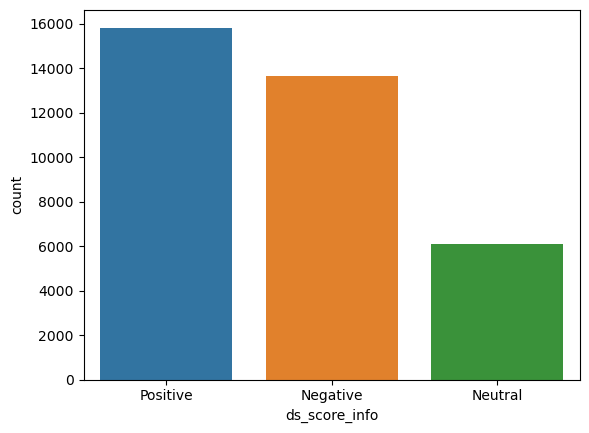

In [64]:
sns.countplot(x='ds_score_info', data=df_concatened_d)

Observation:
    
Headlines & Descriptions contains approximatley:

15500 positive statment

13000 negative statment

6500 neutral statment


# Create a pie chart on info_score column


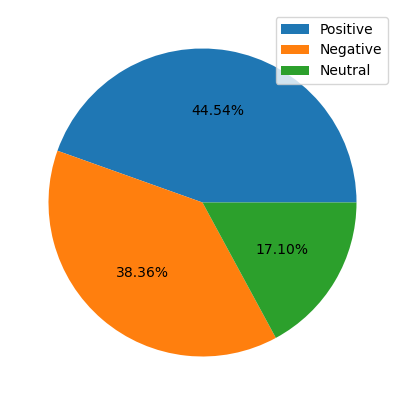

In [65]:
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_d['ds_score_info'].value_counts(normalize = True), autopct='%.2f%%')
plt.legend(['Positive', 'Negative', 'Neutral'])
# displaying chart
plt.show()

Observation:
    
Headlines & Descriptions contains:
    
44.5 % positive statments

38.36 % negtive statements

17.10 % neutral statments


# Spliting in Independent and Dependent Features


In [66]:
X = df_concatened_d['info']
y = df_concatened_d['ds_score_info']

# Train test split
Split the dataset into test and train
90% train , 10% test and random state 212

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

# Modelling on headlines + description of cnbc and reuters datasets


In [69]:
'''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}
map_keys = list(models.keys())

In [70]:
def get_model_building_technique_name(num):
    if num == 1:
        return 'LinearSVC'
    if num == 2:
        return 'LogisticRegression'
    if num == 3:
        return 'MultinomialNB'
    if num == 4:
        return 'BernoulliNB'
    if num == 5:
        return 'GradientBoostingClassifier'
    if num == 6:
        return 'DecisionTreeClassifier'
    if num == 7:
        return 'KNeighborsClassifier'
    return ''


In [72]:
results = [];
for key_index in range(len(map_keys)):
    try:
        key = map_keys[key_index]
        model = models[key]
        print(key)
        model.fit(X_train, y_train)
        '''Test Accuracy'''
        y_pred = model.predict(X_test)
        Accuracy_Test = accuracy_score(y_test, y_pred)
        conf_mat_Test = confusion_matrix(y_test, y_pred)
        true_positive_Test = conf_mat_Test[0][0]
        false_positive_Test = conf_mat_Test[0][1]
        false_negative_Test = conf_mat_Test[1][0]
        true_negative__Test = conf_mat_Test[1][1]
        Precision_Test = true_positive_Test /(true_positive_Test + false_positive_Test)
        Recall_Test = true_positive_Test/(true_positive_Test + false_negative_Test)
        F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
   # AUC_Test = roc_auc_score(y_test, y_pred)
        '''Train Accuracy'''
        y_pred_train = model.predict(X_train)
        Accuracy_Train = accuracy_score(y_train, y_pred_train)
        conf_mat_Train = confusion_matrix(y_train, y_pred_train)
        true_positive_Train = conf_mat_Train[0][0]
        false_positive_Train = conf_mat_Train[0][1]
        false_negative_Train = conf_mat_Train[1][0]
        true_negative__Train = conf_mat_Train[1][1]
        Precision_Train = true_positive_Train /(true_positive_Train + false_positive_Train)
        Recall_Train = true_positive_Train/(true_positive_Train + false_negative_Train)
        F1_Score_Train = 2*(Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
   # AUC_Train = roc_auc_score(y_train, y_pred_train)
        results.append({
           'Model Name' : get_model_building_technique_name(key),
           'Trained Model' : model,
           'Accuracy_Test' : Accuracy_Test,
           'Precision_Test' : Precision_Test,
           'Recall_Test' : Recall_Test, 
           'F1_Score_Test' : F1_Score_Test, 
       # 'AUC_Test' : AUC_Test,
           'Accuracy_Train' : Accuracy_Train,
           'Precision_Train' : Precision_Train,
           'Recall_Train' : Recall_Train, 
           'F1_Score_Train' : F1_Score_Train 
       # 'AUC_Train' : AUC_Train
           })
    except:
        print('Error')   

1
2
3
4
5
6
7


In [73]:
result_df = pd.DataFrame(results)
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.901464,0.961875,0.968026,0.964940,0.983950,0.998019,0.993263,0.995635,0.030695
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.871059,0.963533,0.936220,0.949681,0.939899,0.985091,0.975645,0.980345,0.030665
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.668919,1.000000,0.855864,0.922335,0.717486,0.999682,0.867905,0.929145,0.006810
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.719313,0.955366,0.878603,0.915378,0.811032,0.968690,0.929815,0.948855,0.033477
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.724944,0.976378,0.995984,0.986083,0.741044,0.982784,0.992914,0.987823,0.001740
5,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.825732,0.967890,0.982309,0.975046,1.000000,1.000000,1.000000,1.000000,0.024954
6,KNeighborsClassifier,"(CountVectorizer(), TfidfTransformer(), KNeigh...",0.562218,0.881373,0.798401,0.837838,0.703407,0.937659,0.850832,0.892138,0.054300


Save Best Model


In [74]:
Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_hd.sav', 'wb') as best_model_pickle:
    pickle.dump(Best_Model_Name, best_model_pickle)

# Working with test dataset
Perforn the prediction on the test dataset


In [75]:
# Perforn the prediction on the test dataset
best_model_hd = pickle.load(open('financial_news_model_hd.sav', 'rb'))
result = best_model_hd.predict(X_test)
pd.DataFrame(result)

,0
0,Negative
1,Negative
2,Positive
3,Positive
4,Positive
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


# Working on headlines of cnbc, reuters and guardian datasets
From the dataset you have copied before delete the column of description


In [76]:
df_concatened_d_copied = df_concatened_d_copied.drop(['Description'], axis = 1)
df_concatened_d_copied = df_concatened_d_copied.drop(['ds_score'], axis = 1)

Concatenate the gaurdian headlines dataset and copy of dataset to get all headlines together


In [77]:
df_concatened_h = pd.concat([df_guardian,df_concatened_d_copied], axis = 0).reset_index(drop = True)

Check the shape of all headlines dataset


In [78]:
df_concatened_h.shape

(53315, 2)

Apply preprocessing to the headlines column in the new dataset


In [79]:
df_concatened_h['Headlines'] = df_concatened_h['Headlines'].apply(lambda x : preprocess(x))
df_concatened_h.head()

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear worst ’ four grim tale work life upend ...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...


Analyze polarity score of values in headlines and add new column of it in dataset


In [80]:
df_concatened_h['ds_score_headlines'] = df_concatened_h['Headlines'].apply(lambda x: polarity(x))

Apply the function which decides sentiment to polarity score column


In [81]:
df_concatened_h['ds_score_headlines'] = df_concatened_h['ds_score_headlines'].apply(lambda x : assign_sentiment(x))

In [82]:
df_concatened_h.head()

,Time,Headlines,ds_score_headlines
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear worst ’ four grim tale work life upend ...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...,Negative


# Create a countplot on headline score column


<Axes: xlabel='ds_score_headlines', ylabel='count'>

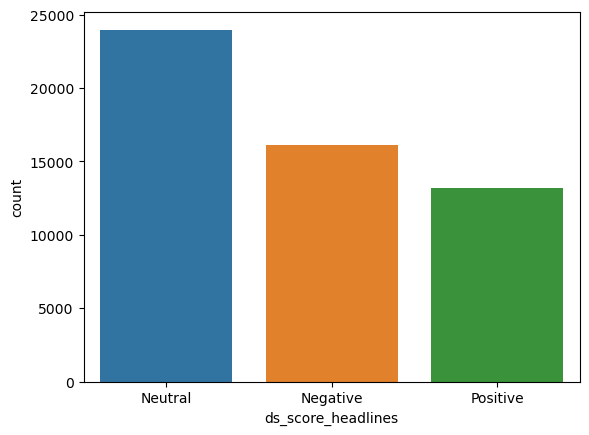

In [83]:
sns.countplot(x='ds_score_headlines', data=df_concatened_h)

Observation:

Headlines contains approximately:

14000 positive statment

16000 negative statment

24000 neutral statment


# Create a pie digram on headline score column


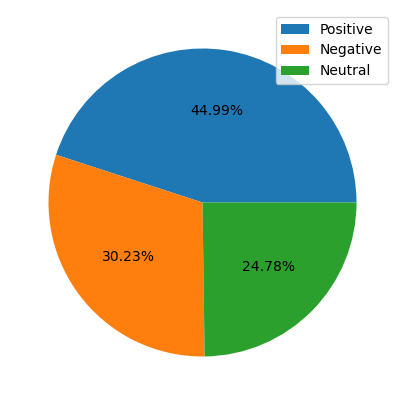

In [84]:
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_h['ds_score_headlines'].value_counts(normalize = True), autopct='%.2f%%')
plt.legend(['Positive', 'Negative', 'Neutral'])
# displaying chart
plt.show()

Observation:

Headlines contains:

24.8% positive statments

30.3% negtive statements

44.9% neutral statments


# Spliting in Independent and Dependent Features


In [85]:
X = df_concatened_h['Headlines']
y = df_concatened_h['ds_score_headlines']

# Train test split
Split the dataset into test and train
90% train , 10% test and random state 212


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

Modeling on headlines


In [87]:
'''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}
map_keys = list(models.keys())


In [88]:
def get_model_building_technique_name(num):
    if num == 1:
        return 'LinearSVC'
    if num == 2:
        return 'LogisticRegression'
    if num == 3:
        return 'MultinomialNB'
    if num == 4:
        return 'BernoulliNB'
    if num == 5:
        return 'GradientBoostingClassifier'
    if num == 6:
        return 'DecisionTreeClassifier'
    if num == 7:
        return 'KNeighborsClassifier'
    return ''

In [89]:
results = [];
for key_index in range(len(map_keys)):
    try:
        key = map_keys[key_index]
        model = models[key]
        print(key)
        model.fit(X_train, y_train)
        '''Test Accuracy'''
        y_pred = model.predict(X_test)
        Accuracy_Test = accuracy_score(y_test, y_pred)
        conf_mat_Test = confusion_matrix(y_test, y_pred)
        true_positive_Test = conf_mat_Test[0][0]
        false_positive_Test = conf_mat_Test[0][1]
        false_negative_Test = conf_mat_Test[1][0]
        true_negative__Test = conf_mat_Test[1][1]
        Precision_Test = true_positive_Test /(true_positive_Test + false_positive_Test)
        Recall_Test = true_positive_Test/(true_positive_Test + false_negative_Test)
        F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
        # AUC_Test = roc_auc_score(y_test, y_pred)
        '''Train Accuracy'''
        y_pred_train = model.predict(X_train)
        Accuracy_Train = accuracy_score(y_train, y_pred_train)
        conf_mat_Train = confusion_matrix(y_train, y_pred_train)
        true_positive_Train = conf_mat_Train[0][0]
        false_positive_Train = conf_mat_Train[0][1]
        false_negative_Train = conf_mat_Train[1][0]
        true_negative__Train = conf_mat_Train[1][1]
        Precision_Train = true_positive_Train /(true_positive_Train + false_positive_Train)
        Recall_Train = true_positive_Train/(true_positive_Train + false_negative_Train)
        F1_Score_Train = 2*(Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
        # AUC_Train = roc_auc_score(y_train, y_pred_train)
        results.append({
            'Model Name' : get_model_building_technique_name(key),
            'Trained Model' : model,
            'Accuracy_Test' : Accuracy_Test,
            'Precision_Test' : Precision_Test,
            'Recall_Test' : Recall_Test, 
            'F1_Score_Test' : F1_Score_Test, 
       # 'AUC_Test' : AUC_Test,
            'Accuracy_Train' : Accuracy_Train,
            'Precision_Train' : Precision_Train,
            'Recall_Train' : Recall_Train, 
            'F1_Score_Train' : F1_Score_Train 
       # 'AUC_Train' : AUC_Train
            })
    except:
        print('Error')

1
2
3
4
5
6
7


In [90]:
result_df = pd.DataFrame(results)
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.971305,0.980557,0.996050,0.988243,0.989330,0.996589,0.995965,0.996277,0.008034
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.932858,0.922324,0.995070,0.957317,0.962674,0.957902,0.996266,0.976707,0.019390
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.839460,0.871979,0.961123,0.914384,0.907780,0.935338,0.978988,0.956666,0.042282
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.886159,0.958051,0.920078,0.938681,0.936915,0.982733,0.951118,0.966667,0.027986
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.789572,0.655195,0.996979,0.790735,0.801617,0.668295,0.997427,0.800344,0.009609
5,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.949737,0.986422,0.997255,0.991809,1.000000,1.000000,1.000000,1.000000,0.008191
6,KNeighborsClassifier,"(CountVectorizer(), TfidfTransformer(), KNeigh...",0.605026,0.650266,0.667577,0.658808,0.749224,0.795404,0.811733,0.803486,0.144678


In [91]:
Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_h.sav', 'wb') as best_model_pickle:
    pickle.dump(Best_Model_Name, best_model_pickle)


# Working with test dataset
Perforn the prediction on the test dataset

In [92]:
best_model_h = pickle.load(open('financial_news_model_h.sav', 'rb'))
result = best_model_h.predict(X_test)
pd.DataFrame(result)


,0
0,Positive
1,Positive
2,Negative
3,Neutral
4,Negative
...,...
5327,Neutral
5328,Negative
5329,Positive
5330,Neutral


# Prediction
You can check the result on real time news headlines

Here i have used two fiancial news headlines and predicted its sentiment

You can try more


In [93]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = best_model_h.predict(sent1)
y_predict


array(['Negative'], dtype=object)

In [94]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = best_model_h.predict(sent2)
y_predict

array(['Positive'], dtype=object)